## Species profiles as function of C-rate

# Figure Creation Scripts

Start by importing the necessary modules:

In [1]:
import pandas as pd
import numpy as np
import csv
from math import floor
from matplotlib import pyplot as plt
import matplotlib
import os
import sys
from math import ceil, floor

owd = os.getcwd()


## Import model modules:

In [2]:
sys.path.append('model-files/')
from li_s_battery_init import inputs
from li_s_battery_init import cathode as cat
from li_s_battery_init import anode as an
from li_s_battery_post import tag_strings

Density for cascade
Using cascade
Inputs check
dG = [-16459999.99999994]
E_o_an =  [0.46939777]
[1.86349568 1.72046876 1.63496354 1.53650298 1.42508708]
A_S = 100000.0
A_L = 100000.0
A_C = 19672.564730328388
Elyte/sulfur ratio  2.701041666666667
Porosity = 0.7779
solid sulfur = 0.019
External current = -49.34659538815977
Initialization check


## Helper functions:

In [3]:
# Function definitions
def get_file_name(find_string, dir_path, **kwargs):
    flag = kwargs.get('flag', None)
    path = os.path.join('..','data',dir_path)
    full_list = os.listdir(path)
    if flag:
        file_name = [file for file in full_list if find_string in file]
    else:
        file_name = [file for file in full_list if find_string in file][0]
        
    return file_name

def df_name(file_name_list, file_number):
    file_name = file_name_list[file_number]
    df_name = file_name.split('_')
    return df_name[0]

def read_file(file_name_list):
    df_dict = {}
    for i in np.arange(0, len(file_name_list)):
        name = df_name(file_name_list, i)
        df_dict[name] = pd.read_csv(file_name_list[i])
    return df_dict

def sort_df(SV):
    Vcell = {}
    Capacity = {}
    C_k = {}
    C_Lip = {}
    eps_S8 = {}
    eps_Li2S = {}
    keys = list(SV.keys())
    tags = tag_strings(SV['dch0.1C'])
    keys_Lip = np.array([])
    keys_Ck = np.array([])
    keys_eps_S8 = np.array([])
    keys_eps_Li2S = np.array([])
    for i in np.arange(0, len(SV.keys())):
        offset = i*9
        Crate = keys[i]
        Vcell[Crate] = SV[Crate]['Phi_ed1']
        Capacity[Crate] = SV[Crate]['Time']
        for key in SV[Crate]:
            if key.startswith('rho_Li+(e)'):
                keys_Lip = np.append(keys_Lip, key)   
            if key.startswith('rho_S') or key.startswith('rho_Li2S'):
                keys_Ck = np.append(keys_Ck, key)
            if key.startswith('eps_S8'):
                keys_eps_S8 = np.append(keys_eps_S8, key)
            if key.startswith('eps_Li2S'):
                keys_eps_Li2S = np.append(keys_eps_Li2S, key)

        C_k[Crate] = SV[Crate][keys_Ck]
        C_Lip[Crate] = SV[Crate][keys_Lip]
        eps_S8[Crate] = SV[Crate][keys_eps_S8]
        eps_Li2S[Crate] = SV[Crate][keys_eps_Li2S]
    return Vcell, Capacity, C_k, C_Lip, eps_S8, eps_Li2S



def sort_df_short(SV):
    Vcell = {}
    Capacity = {}
    C_k = {}
    C_Lip = {}
    keys = list(SV.keys())
    tags = tag_strings(SV['dch0.1C'])
    keys_Lip = np.array([])
    for i in np.arange(0, len(SV.keys())):
        offset = i*9
        Crate = keys[i]
        Vcell[Crate] = SV[Crate]['Phi_ed1']
        Capacity[Crate] = SV[Crate]['Time']
        C_k[Crate] = SV[Crate][tags['rho_el']]
        print(tags['rho_el'])
        for key in SV[Crate]:
            if key.startswith('rho_Li+(e)'):
                keys_Lip = np.append(keys_Lip, key)        
        C_Lip[Crate] = SV[Crate][keys_Lip]
    return Vcell, Capacity, C_k, C_Lip




def tick_format(ax):
    ax.tick_params(direction='in',top=True, right=True)
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(tick_font)
        tick.label1.set_fontname(font)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(tick_font)
        tick.label1.set_fontname(font)

In [4]:

os.chdir(owd)
Lithiated_85pct_25um_files = get_file_name('.csv', os.path.join('Bessler Data','Lithiated','100 um cathode 85% porosity'), flag=1)
Lithiated_4uL_files = get_file_name('.csv', os.path.join('Bessler Data','Lithiated','100 um cathode 4 uL'), flag=1)
Lithiated_3uL_files = get_file_name('.csv', os.path.join('Bessler Data','Lithiated','100 um cathode 3 uL'), flag=1)
Lithiated_2uL_files = get_file_name('.csv', os.path.join('Bessler Data','Lithiated','100 um cathode 2 uL'), flag=1)

Lithiated_65pct_25um_files = get_file_name('.csv', 'Lithiated Data/100 um cathode 65% porosity', flag=1)

nonLithiated_85pct_25um_files = get_file_name('.csv', 'Bessler Data/Non Lithiated/100 um cathode 85% porosity', flag=1)
cascade_65pct_25um_files = get_file_name('.csv', 'Cascade Data/100 um cathode 65% porosity', flag=1)
cascade_45pct_25um_files = get_file_name('.csv', 'Cascade Data/100 um cathode 45% porosity', flag=1)

kuzmina_85pct_25um_files = get_file_name('.csv', 'Kuzmina Data/100 um cathode 85% porosity', flag=1)
kuzmina_65pct_25um_files = get_file_name('.csv', 'Kuzmina Data/100 um cathode 65% porosity', flag=1)
kuzmina_45pct_25um_files = get_file_name('.csv', 'Kuzmina Data/100 um cathode 45% porosity', flag=1)

assary_85pct_25um_files = get_file_name('.csv', 'Assary Data/100 um cathode 85% porosity', flag=1)
assary_65pct_25um_files = get_file_name('.csv', 'Assary Data/100 um cathode 65% porosity', flag=1)
assary_45pct_25um_files = get_file_name('.csv', 'Assary Data/100 um cathode 45% porosity', flag=1)

bessler_85pct_25um_files = get_file_name('.csv', 'Bessler Data/100 um cathode 85% porosity 25 um sep', flag=1)
bessler_85pct_10um_files = get_file_name('.csv', 'Bessler Data/100 um cathode 85% porosity 10 um sep', flag=1)
bessler_ver_files = get_file_name('.csv', 'Bessler Data/Bessler microstructure', flag=1)

In [5]:
import importlib

# Import lithiated Bessler files with 100 um cat, 25um sep, and 85% porosity cat
os.chdir(owd)
os.chdir('../data/Bessler Data/Lithiated/100 um cathode 85% porosity')
lithiated_85pct25um = read_file(Lithiated_85pct_25um_files)
os.chdir(owd)

# Import lithiated Bessler files with 100 um cat 4 uL E/S
os.chdir(owd)
os.chdir('../data/Bessler Data/Lithiated/100 um cathode 4 uL')
lithiated_4uL = read_file(Lithiated_4uL_files)

# Import lithiated Bessler files with 100 um cat 3 uL E/S
os.chdir(owd)
os.chdir('../data/Bessler Data/Lithiated/100 um cathode 3 uL')
lithiated_3uL = read_file(Lithiated_3uL_files)

# Import lithiated Bessler files with 100 um cat 2 uL E/S
os.chdir(owd)
os.chdir('../data/Bessler Data/Lithiated/100 um cathode 2 uL')
lithiated_2uL = read_file(Lithiated_2uL_files)

os.chdir(owd)

#-------------------------------------------------------------------------------
# Import lithiated cascade files with 100 um cat, 25um sep, and 65% porosity cat
os.chdir(owd)
os.chdir('../data/Lithiated Data/100 um cathode 65% porosity')
lithiated_65pct25um = read_file(Lithiated_65pct_25um_files)
os.chdir(owd)


In [6]:
# Import non-lithiated cascade files with 100 um cat, 25um sep
os.chdir(owd)
os.chdir('../data/Bessler Data/Non Lithiated/100 um cathode 85% porosity')
cascade_85pct25um = read_file(nonLithiated_85pct_25um_files)
os.chdir(owd)

#os.chdir(owd)
#os.chdir('../data/Cascade Data/100 um cathode 65% porosity')
#cascade_65pct25um = read_file(cascade_65pct_25um_files)
#os.chdir(owd)

#os.chdir(owd)
#os.chdir('../data/Cascade Data/100 um cathode 45% porosity')
#cascade_45pct25um = read_file(cascade_45pct_25um_files)
#os.chdir(owd)

In [7]:
# Import Kuzmina files with 100 um cat, 25um sep
os.chdir(owd)
os.chdir('../data/Kuzmina Data/100 um cathode 85% porosity')
kuzmina_85pct25um = read_file(kuzmina_85pct_25um_files)
os.chdir(owd)

os.chdir(owd)
os.chdir('../data/Kuzmina Data/100 um cathode 65% porosity')
kuzmina_65pct25um = read_file(kuzmina_65pct_25um_files)
os.chdir(owd)

os.chdir(owd)
os.chdir('../data/Kuzmina Data/100 um cathode 45% porosity')
kuzmina_45pct25um = read_file(kuzmina_45pct_25um_files)
os.chdir(owd)

In [8]:
# Import Assary files with 100 um cat, 25um sep
os.chdir(owd)
os.chdir('../data/Assary Data/100 um cathode 85% porosity')
assary_85pct25um = read_file(assary_85pct_25um_files)
os.chdir(owd)

os.chdir(owd)
os.chdir('../data/Assary Data/100 um cathode 65% porosity')
assary_65pct25um = read_file(assary_65pct_25um_files)
os.chdir(owd)

os.chdir(owd)
os.chdir('../data/Assary Data/100 um cathode 45% porosity')
assary_45pct25um = read_file(assary_45pct_25um_files)
os.chdir(owd)

In [9]:
Vcell_Li_85pct25um, Cap_Li_85pct25um, C_k_Li_85pct25um, C_Lip_85pct25um, eps_S8_85pct25um, eps_Li2S_85pct25um = sort_df(lithiated_85pct25um)
Vcell_Li_4uL, Cap_Li_4uL, C_k_Li_4uL, C_Lip_4uL, eps_S8_4uL, eps_Li2S_4uL = sort_df(lithiated_4uL)
Vcell_Li_3uL, Cap_Li_3uL, C_k_Li_3uL, C_Lip_3uL, eps_S8_3uL, eps_Li2S_3uL = sort_df(lithiated_3uL)
Vcell_Li_2uL, Cap_Li_2uL, C_k_Li_2uL, C_Lip_2uL, eps_S8_2uL, eps_Li2S_2uL = sort_df(lithiated_2uL)

Vcell_Li_65pct25um, Cap_Li_65pct25um, C_k_Li_65pct25um, C_Lip_65pct25um, eps_S8_65pct25um, eps_Li2S_65pct25um = sort_df(lithiated_65pct25um)

In [10]:
Vcell_cascade_85pct25um, Cap_cascade_85pct25um, C_k_cascade_85pct25um, C_Lip_cascade_85pct25um, eps_S8_cascade_85pct25um, eps_Li2S_cascade_85pct25um = sort_df(cascade_85pct25um)
#Vcell_cascade_65pct25um, Cap_cascade_65pct25um, C_k_cascade_65pct25um, C_Lip_cascade_65pct25um, eps_S8_cascade_65pct25um, eps_Li2S_cascade_65pct25um = sort_df(cascade_65pct25um)
#Vcell_cascade_45pct25um, Cap_cascade_45pct25um, C_k_cascade_45pct25um, C_Lip_cascade_45pct25um, eps_S8_cascade_45pct25um, eps_Li2S_cascade_45pct25um = sort_df(cascade_45pct25um)

In [11]:
Vcell_kuzmina_85pct25um, Cap_kuzmina_85pct25um, C_k_kuzmina_85pct25um, C_Lip_kuzmina_85pct25um, eps_S8_kuzmina_85pct25um, eps_Li2S_kuzmina_85pct25um = sort_df(kuzmina_85pct25um)
Vcell_kuzmina_65pct25um, Cap_kuzmina_65pct25um, C_k_kuzmina_65pct25um, C_Lip_kuzmina_65pct25um, eps_S8_kuzmina_65pct25um, eps_Li2S_kuzmina_65pct25um = sort_df(kuzmina_65pct25um)
Vcell_kuzmina_45pct25um, Cap_kuzmina_45pct25um, C_k_kuzmina_45pct25um, C_Lip_kuzmina_45pct25um, eps_S8_kuzmina_45pct25um, eps_Li2S_kuzmina_45pct25um = sort_df(kuzmina_45pct25um)

In [12]:
Vcell_assary_85pct25um, Cap_assary_85pct25um, C_k_assary_85pct25um, C_Lip_assary_85pct25um, eps_S8_assary_85pct25um, eps_Li2S_assary_85pct25um = sort_df(assary_85pct25um)
Vcell_assary_65pct25um, Cap_assary_65pct25um, C_k_assary_65pct25um, C_Lip_assary_65pct25um, eps_S8_assary_65pct25um, eps_Li2S_assary_65pct25um = sort_df(assary_65pct25um)
Vcell_assary_45pct25um, Cap_assary_45pct25um, C_k_assary_45pct25um, C_Lip_assary_45pct25um, eps_S8_assary_45pct25um, eps_Li2S_assary_45pct25um = sort_df(assary_45pct25um)

In [13]:
tick_font = 10
label_font = 12
font = 'Calibri'
lw = 2.0
keys = ['dch0.1C', 'dch0.2C', 'dch0.3C', 'dch0.4C', 'dch0.5C', 'dch0.6C', 'dch0.7C',
        'dch0.8C', 'dch0.9C', 'dch1.0C', 'dch1.1C', 'dch1.2C', 'dch1.3C',
        'dch1.4C', 'dch1.5C']
keys_ES = ['dch0.1C', 'dch0.2C', 'dch0.3C', 'dch0.4C', 'dch0.5C', 'dch0.6C', 'dch0.7C',
        'dch0.8C', 'dch0.9C', 'dch1.0C', 'dch1.1C', 'dch1.2C', 'dch1.3C',
        'dch1.4C', 'dch1.5C', 'dch1.6C', 'dch1.7C', 'dch1.8C', 'dch1.9C', 'dch2C']
keys_s = ['dch0.1C', 'dch0.5C', 'dch1.0C', 'dch1.5C']
tags = tag_strings(lithiated_85pct25um['dch0.1C'])
species = ['S8', 'Li2S8', 'Li2S6', 'Li2S4', 'Li2S2', 'Li2S']
grad = np.linspace(0, 1.15, 7)
species_cmap = np.zeros((len(grad),4))
for i, val in enumerate(grad):
    species_cmap[i] = matplotlib.cm.plasma(val)
colormap = plt.cm.get_cmap('plasma')


## Figure 1: Validation against Andrei, et al. data

In [14]:
exp_data_01C = pd.read_csv(os.path.join('../data/Andrei_data',r'0.1C Data.csv'), header=None)
exp_data_05C = pd.read_csv(os.path.join('../data/Andrei_data',r'0.5C Data.csv'), header=None)
exp_data_1C = pd.read_csv(os.path.join('../data/Andrei_data',r'1C Data.csv'), header=None)

### Figure 2a: Non-lithiated Cascade

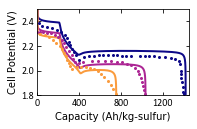

In [31]:
os.chdir(owd)
# os.chdir('Figures/voltage/Andrei validation')
fig = plt.figure(1)
ax = fig.add_axes([0.2, 0.2, 0.7, 0.6])
ax.tick_params(direction='in',top=True, right=True)

fig.set_size_inches((3., 2.))

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(tick_font)
    tick.label1.set_fontname(font)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(tick_font)
    tick.label1.set_fontname(font)


p1, = plt.plot(Cap_cascade_85pct25um[keys_s[0]], Vcell_cascade_85pct25um[keys_s[0]], '-', color=species_cmap[0], 
    linewidth=lw)
p2, = plt.plot(Cap_cascade_85pct25um[keys_s[1]], Vcell_cascade_85pct25um[keys_s[1]], '-', color=species_cmap[2], 
    linewidth=lw)
p3, = plt.plot(Cap_cascade_85pct25um[keys_s[2]], Vcell_cascade_85pct25um[keys_s[2]], '-', color=species_cmap[-3], 
    linewidth=lw)

p4, = plt.plot(exp_data_01C.iloc[:,0], exp_data_01C.iloc[:,1], 'o', color=species_cmap[0], markersize=2.)
p5, = plt.plot(exp_data_05C.iloc[:,0], exp_data_05C.iloc[:,1], 'o', color=species_cmap[2], markersize=2.)
p6, = plt.plot(exp_data_1C.iloc[:,0], exp_data_1C.iloc[:,1], 'bo', color=species_cmap[-3], markersize=2.)

plt.xlim((0, 1450))
plt.xticks([0, 400, 800, 1200])
plt.ylim((1.8, 2.5))

plt.xlabel('Capacity (Ah/kg-sulfur)')
plt.ylabel('Cell Potential (V)')
fig.savefig('Figure2a_CascadeValidation.pdf',dpi=350)
plt.show()
os.chdir(owd)


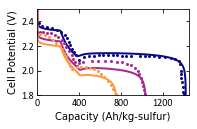

In [30]:
os.chdir(owd)
# os.chdir('Figures/voltage/Andrei validation')
fig = plt.figure(1)
ax = fig.add_axes([0.2, 0.2, 0.7, 0.6])
ax.tick_params(direction='in',top=True,right=True)
fig.set_size_inches((3., 2.))

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(tick_font)
    tick.label1.set_fontname(font)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(tick_font)
    tick.label1.set_fontname(font)

p1, = plt.plot(Cap_Li_85pct25um[keys_s[0]], Vcell_Li_85pct25um[keys_s[0]], '-', color=species_cmap[0], linewidth=lw)
p2, = plt.plot(Cap_Li_85pct25um[keys_s[1]], Vcell_Li_85pct25um[keys_s[1]], '-', color=species_cmap[2], linewidth=lw)
p3, = plt.plot(Cap_Li_85pct25um[keys_s[2]], Vcell_Li_85pct25um[keys_s[2]], '-', color=species_cmap[-3], linewidth=lw)

p4, = plt.plot(exp_data_01C.iloc[:,0], exp_data_01C.iloc[:,1], 'o', color=species_cmap[0], markersize=2.)
p5, = plt.plot(exp_data_05C.iloc[:,0], exp_data_05C.iloc[:,1], 'o', color=species_cmap[2], markersize=2.)
p6, = plt.plot(exp_data_1C.iloc[:,0], exp_data_1C.iloc[:,1], 'o', color=species_cmap[-3], markersize=2.)

plt.xlim((0, 1450))
plt.xticks([0, 400, 800, 1200])
plt.ylim((1.8, 2.5))

plt.xlabel('Capacity (Ah/kg-sulfur)')
plt.ylabel('Cell Potential (V)')
fig.savefig('Figure2b_LithiatedCascadeValidation.pdf',dpi=350)
plt.show()
os.chdir(owd)

## Figure 3: Comparison of lithiated, non-lithiated, Assary, and Kuzmina mechs. voltage versus capacity

[[5.03830e-02 2.98030e-02 5.27975e-01 1.00000e+00]
 [4.05503e-01 6.78000e-04 6.56977e-01 1.00000e+00]
 [6.74522e-01 1.47419e-01 5.78688e-01 1.00000e+00]
 [8.62927e-01 3.65119e-01 4.03519e-01 1.00000e+00]
 [9.79233e-01 6.07532e-01 2.38013e-01 1.00000e+00]
 [9.64021e-01 9.07950e-01 1.49370e-01 1.00000e+00]
 [9.40015e-01 9.75158e-01 1.31326e-01 1.00000e+00]] [[5.03830e-02 2.98030e-02 5.27975e-01 1.00000e+00]
 [4.05503e-01 6.78000e-04 6.56977e-01 1.00000e+00]
 [6.74522e-01 1.47419e-01 5.78688e-01 1.00000e+00]
 [8.62927e-01 3.65119e-01 4.03519e-01 1.00000e+00]
 [9.64021e-01 9.07950e-01 1.49370e-01 1.00000e+00]
 [9.79233e-01 6.07532e-01 2.38013e-01 1.00000e+00]
 [9.40015e-01 9.75158e-01 1.31326e-01 1.00000e+00]]


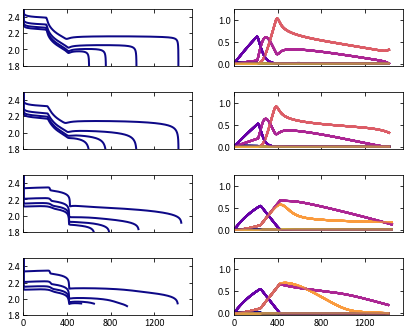

In [33]:
os.chdir(owd)
# os.chdir('Figures/voltage/mechanism comparison')

fig, axs = plt.subplots(4, 2, sharex=True, sharey=False, num=i)
plt.tight_layout()
fig.set_size_inches((6., 5.))

for i in range(4):
    for j in range(2):
        tick_format(axs[i,j])

    
for k in range(4):
    axs[0,0].plot(Cap_cascade_85pct25um[keys_s[k]], Vcell_cascade_85pct25um[keys_s[k]], color = species_cmap[0], 
        linewidth=lw)
    axs[1,0].plot(Cap_Li_85pct25um[keys_s[k]], Vcell_Li_85pct25um[keys_s[k]], color = species_cmap[0], linewidth=lw)
    axs[2,0].plot(Cap_assary_85pct25um[keys_s[k]], Vcell_assary_85pct25um[keys_s[k]], color = species_cmap[0], 
        linewidth=lw)
    axs[3,0].plot(Cap_kuzmina_85pct25um[keys_s[k]], Vcell_kuzmina_85pct25um[keys_s[k]], color = species_cmap[0], 
        linewidth=lw)

points = inputs.npoints_cathode+inputs.npoints_sep+1
alphas = np.linspace(1.,0.3,points)
# We unfortunately need to mess around with species order, to keep consistent coloring, for Assary and Kuz/mina:
cmap_atomistic = np.vstack((species_cmap[:4], species_cmap[5], species_cmap[4], species_cmap[6:]))
print(species_cmap, cmap_atomistic)

for i in np.arange(0, 1, 1):
    for j in np.arange(0, points):
        offset = j*6
        for k in np.arange(0, 6):
            axs[1,1].plot(Cap_Li_85pct25um[keys_s[i]], C_k_Li_85pct25um[keys_s[i]].iloc[:, k+offset], 
                     linewidth=lw, color=species_cmap[k], alpha = alphas[j])
            axs[0,1].plot(Cap_cascade_85pct25um[keys_s[i]], C_k_cascade_85pct25um[keys_s[i]].iloc[:, k+offset], 
                     linewidth=lw, color=species_cmap[k], alpha = alphas[j])
            axs[2,1].plot(Cap_assary_85pct25um[keys_s[i]], C_k_assary_85pct25um[keys_s[i]].iloc[:, k+offset],
                         linewidth=lw, color=cmap_atomistic[k], alpha = alphas[j])
            axs[3,1].plot(Cap_kuzmina_85pct25um[keys_s[i]], C_k_kuzmina_85pct25um[keys_s[i]].iloc[:, k+offset],
                         linewidth=lw, color=cmap_atomistic[k], alpha = alphas[j])

plt.xlim((0, 1550))
plt.xticks([0, 400, 800, 1200])

for i in range(4):
    axs[i,0].set_ylim((1.8,2.5))
    axs[i,0].set_yticks([1.8, 2.0, 2.2, 2.4])
    axs[i,1].set_ylim((-0.05,1.25))
    axs[i,1].set_yticks([0.0, 0.5, 1.0])

plt.show()
fig.savefig('Figure3_Mechanism_comparison.pdf')
os.chdir(owd)

# What does it look like with the exp data overlaid?

[1.         0.87096359 0.75857758 0.66069345 0.57543994 0.50118723
 0.43651583 0.3801894  0.33113112 0.28840315 0.25118864 0.21877616
 0.19054607 0.16595869 0.14454398 0.12589254 0.10964782 0.09549926
 0.08317638 0.0724436  0.06309573 0.05495409 0.04786301 0.04168694
 0.03630781 0.03162278]


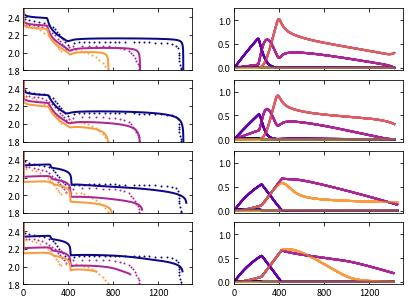

In [34]:
os.chdir(owd)

fig, axs = plt.subplots(4, 2, sharex=True, sharey=False, num=i)
plt.tight_layout()
fig.set_size_inches((6., 4.5))

for i in range(4):
    for j in range(2):
        tick_format(axs[i,j])

c_rate_cmap = species_cmap[[0,2,-3]]

for i in range(4):
    axs[i,0].plot(exp_data_01C.iloc[:,0], exp_data_01C.iloc[:,1], 'o', 
        markeredgecolor=c_rate_cmap[0],markersize=1.,markerfacecolor=None)
    axs[i,0].plot(exp_data_05C.iloc[:,0], exp_data_05C.iloc[:,1], 'o', 
        markeredgecolor=c_rate_cmap[1],markersize=1.,markerfacecolor=None)
    axs[i,0].plot(exp_data_1C.iloc[:,0], exp_data_1C.iloc[:,1], 'o', 
        markeredgecolor=c_rate_cmap[2],markersize=1.,markerfacecolor=None)

for k in range(3):
    axs[0,0].plot(Cap_cascade_85pct25um[keys_s[k]], Vcell_cascade_85pct25um[keys_s[k]], color = c_rate_cmap[k], 
        linewidth=lw)
    axs[1,0].plot(Cap_Li_85pct25um[keys_s[k]], Vcell_Li_85pct25um[keys_s[k]], color = c_rate_cmap[k], linewidth=lw)
    axs[2,0].plot(Cap_assary_85pct25um[keys_s[k]], Vcell_assary_85pct25um[keys_s[k]], color = c_rate_cmap[k], 
        linewidth=lw)
    axs[3,0].plot(Cap_kuzmina_85pct25um[keys_s[k]], Vcell_kuzmina_85pct25um[keys_s[k]], color = c_rate_cmap[k], 
        linewidth=lw)

points = inputs.npoints_cathode+inputs.npoints_sep+1
alphas = np.logspace(0.,-1.5,points)
print(alphas)
# We unfortunately need to mess around with species order, to keep consistent coloring, for Assary and Kuz/mina:
cmap_atomistic = np.vstack((species_cmap[:4], species_cmap[5], species_cmap[4], species_cmap[6:]))

for i in np.arange(0, 1, 1):
    for j in np.arange(0, points):
        offset = j*6
        for k in np.arange(0, 6):
            axs[1,1].plot(Cap_Li_85pct25um[keys_s[i]], C_k_Li_85pct25um[keys_s[i]].iloc[:, k+offset], 
                     linewidth=lw, color=species_cmap[k], alpha = alphas[j])
            axs[0,1].plot(Cap_cascade_85pct25um[keys_s[i]], C_k_cascade_85pct25um[keys_s[i]].iloc[:, k+offset], 
                     linewidth=lw, color=species_cmap[k], alpha = alphas[j])
            axs[2,1].plot(Cap_assary_85pct25um[keys_s[i]], C_k_assary_85pct25um[keys_s[i]].iloc[:, k+offset],
                         linewidth=lw, color=cmap_atomistic[k], alpha = alphas[j])
            axs[3,1].plot(Cap_kuzmina_85pct25um[keys_s[i]], C_k_kuzmina_85pct25um[keys_s[i]].iloc[:, k+offset],
                         linewidth=lw, color=cmap_atomistic[k], alpha = alphas[j])

plt.xlim((0, 1500))
plt.xticks([0, 400, 800, 1200])

for i in range(4):
    axs[i,0].set_ylim((1.8,2.5))
    axs[i,0].set_yticks([1.8, 2.0, 2.2, 2.4])
    axs[i,1].set_ylim((-0.05,1.25))
    axs[i,1].set_yticks([0.0, 0.5, 1.0])

plt.subplots_adjust(hspace=0.15,wspace=0.25)
plt.show()
fig.savefig('Figure3_alt_Mechanism_comparison.pdf')
os.chdir(owd)

## Comparison of lithiated and non-lithiated mechanisms species profiles and Li+ concentration

[2.500e-06 7.500e-06 1.250e-05 1.750e-05 2.250e-05 2.750e-05 3.250e-05
 3.750e-05 4.250e-05 4.750e-05 5.250e-05 5.750e-05 6.250e-05 6.750e-05
 7.250e-05 7.750e-05 8.250e-05 8.750e-05 9.250e-05 9.750e-05 1.025e-04
 1.075e-04 1.125e-04 1.175e-04 1.225e-04 1.275e-04]
0.0001 0.63 9.5e-05


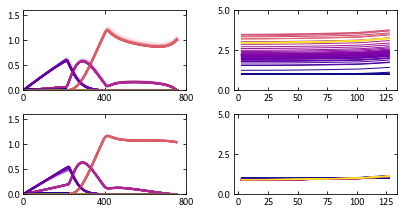

In [19]:
os.chdir(owd)

# Let's plot 1C results:
C_rate_key = 2

fig, axs = plt.subplots(2, 2, sharex=False, sharey=False, num=1)
plt.tight_layout()
fig.set_size_inches((6., 3.))

times = Cap_Li_85pct25um[keys_s[C_rate_key]]
t_final = times.iloc[-1]
times_cmap_Li = np.zeros((len(times),4))
for i, t in enumerate(times):
    times_cmap_Li[i] = matplotlib.cm.plasma(0.96*t/t_final)

times = Cap_cascade_85pct25um[keys_s[C_rate_key]]
t_final = times.iloc[-1]
times_cmap_nonLi = np.zeros((len(times),4))
for i, t in enumerate(times):
    times_cmap_nonLi[i] = matplotlib.cm.plasma(0.96*t/t_final)

for i in range(2):
    for j in range(2):
        axs[i,j].tick_params(direction='in')
        tick_format(axs[i,j])
    
for j in np.arange(0, points-1):
    offset = j*6
    for k in np.arange(0, 6):
        axs[1,0].plot(Cap_Li_85pct25um[keys_s[C_rate_key]], 
            C_k_Li_85pct25um[keys_s[C_rate_key]].iloc[:, k+offset], linewidth=lw, 
            color=species_cmap[k], alpha=alphas[j])
        axs[0,0].plot(Cap_cascade_85pct25um[keys_s[C_rate_key]], 
            C_k_cascade_85pct25um[keys_s[C_rate_key]].iloc[:, k+offset], linewidth=lw, 
            color=species_cmap[k], alpha=alphas[j])
            
x_cat = np.concatenate((np.linspace(2.5e-6, inputs.H_cat+2.5e-6, inputs.npoints_cathode+1)[:-1], 
     np.linspace(inputs.H_cat+2.5e-6, inputs.H_cat+inputs.H_elyte-2.5e-6, inputs.npoints_sep),np.array([inputs.H_cat+inputs.H_elyte+0.5*inputs.H_an*(1-0.95)])),0)
print(x_cat)
print(inputs.H_an, inputs.epsilon_an, inputs.H_an*0.95)

for j in np.arange(0, len(Cap_Li_85pct25um[keys_s[C_rate_key]]), 30):
    axs[1,1].plot(x_cat*1e6, C_Lip_85pct25um[keys_s[C_rate_key]].iloc[j, 0:points],
                  '-',color = times_cmap_Li[j], linewidth=lw/2)#, alpha=(j+100)/(len(Cap_Li_65pct25um[keys_s[C_rate_key]])+100))

for j in np.arange(0, len(Cap_cascade_85pct25um[keys_s[C_rate_key]]), 30):
    axs[0,1].plot(x_cat*1e6, C_Lip_cascade_85pct25um[keys_s[C_rate_key]].iloc[j, 0:points],
                  '-',color = times_cmap_nonLi[j], linewidth=lw/2)#color = species_cmap[0], alpha=(j+100)/(len(Cap_cascade_65pct25um[keys_s[C_rate_key]])+100))

for j in range(2):
    axs[j,0].set_xlim((0, 800))
    axs[j,0].set_xticks([0, 400, 800])
    axs[j,0].set_ylim((0.,1.6))
    axs[j,0].set_yticks([0.0, 0.5, 1.0, 1.5])
    axs[j,1].set_ylim((0, 5))
    axs[j,1].set_yticks([0.0, 2.5, 5.0])
    # axs[j,1].set_xlim((0, 125))
    axs[j,1].set_xticks([0, 25, 50, 75, 100, 125])

plt.show()
fig.savefig('Figure4_PolysulfideMechComparison.pdf')
os.chdir(owd)

## Scale Li concentration according to initial volume fraction:

NameError: name 'Cap_cascade_65pct25um' is not defined

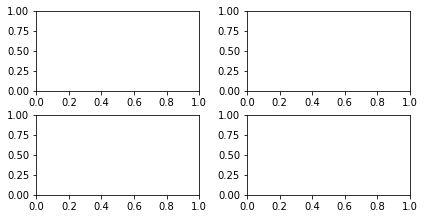

In [20]:
os.chdir(owd)

# Let's plot 1C results:
C_rate_key = 2

# Carbon volume fraction: read manually from input file.
eps_C = 0.255

fig, axs = plt.subplots(2, 2, sharex=False, sharey=False, num=1)
plt.tight_layout()
fig.set_size_inches((6., 3.))

times = Cap_Li_65pct25um[keys_s[C_rate_key]]
t_final = times.iloc[-1]
times_cmap_Li = np.zeros((len(times),4))
for i, t in enumerate(times):
    times_cmap_Li[i] = matplotlib.cm.plasma(0.96*t/t_final)

times = Cap_cascade_65pct25um[keys_s[C_rate_key]]
t_final = times.iloc[-1]
times_cmap_nonLi = np.zeros((len(times),4))
for i, t in enumerate(times):
    times_cmap_nonLi[i] = matplotlib.cm.plasma(0.96*t/t_final)

for i in range(2):
    for j in range(2):
        axs[i,j].tick_params(direction='in')
        tick_format(axs[i,j])
    
for j in np.arange(0, points-1):
    offset = j*6
    for k in np.arange(0, 6):
        axs[1,0].plot(Cap_Li_65pct25um[keys_s[C_rate_key]], 
            C_k_Li_65pct25um[keys_s[C_rate_key]].iloc[:, k+offset], linewidth=lw, 
            color=species_cmap[k], alpha=alphas[j])
        
        axs[0,0].plot(Cap_cascade_65pct25um[keys_s[C_rate_key]], 
            C_k_cascade_65pct25um[keys_s[C_rate_key]].iloc[:, k+offset], linewidth=lw, 
            color=species_cmap[k], alpha=alphas[j])
        
x_cat = np.concatenate((np.linspace(2.5e-6, inputs.H_cat+2.5e-6, inputs.npoints_cathode+1)[:-1], 
     np.linspace(inputs.H_cat+2.5e-6, inputs.H_cat+inputs.H_elyte+2.5e-6, inputs.npoints_sep+1)),0)

for j in np.arange(0, len(Cap_Li_65pct25um[keys_s[C_rate_key]]), 30):
    eps_scale = np.ones((points))
    for i in range(inputs.npoints_cathode):
        eps_scale[i] = ((1. - eps_C - eps_S8_65pct25um[keys_s[C_rate_key]].iloc[j,i] - eps_Li2S_65pct25um[keys_s[C_rate_key]].iloc[j,i])
            /(1. - eps_C - eps_S8_65pct25um[keys_s[C_rate_key]].iloc[0,i] - eps_Li2S_65pct25um[keys_s[C_rate_key]].iloc[0,i]))
    
    axs[1,1].plot(x_cat*1e6, C_Lip_65pct25um[keys_s[C_rate_key]].iloc[j, :points]*eps_scale,
                  '-',color = times_cmap_Li[j], linewidth=lw/2)#, alpha=(j+100)/(len(Cap_Li_65pct25um[keys_s[C_rate_key]])+100))

for j in np.arange(0, len(Cap_cascade_65pct25um[keys_s[C_rate_key]]), 30):
    eps_scale = np.ones((points))
    for i in range(inputs.npoints_cathode):
        eps_scale[i] = ((1. - eps_C - eps_S8_cascade_65pct25um[keys_s[C_rate_key]].iloc[j,i] - eps_Li2S_cascade_65pct25um[keys_s[C_rate_key]].iloc[j,i])
            /(1. - eps_C - eps_S8_cascade_65pct25um[keys_s[C_rate_key]].iloc[0,i]) - eps_Li2S_cascade_65pct25um[keys_s[C_rate_key]].iloc[0,i])
                            
    axs[0,1].plot(x_cat*1e6, C_Lip_cascade_65pct25um[keys_s[C_rate_key]].iloc[j, 0:points]*eps_scale,
                  '-',color = times_cmap_nonLi[j], linewidth=lw/2)#color = species_cmap[0], alpha=(j+100)/(len(Cap_cascade_65pct25um[keys_s[C_rate_key]])+100))

for j in range(2):
    axs[j,0].set_xlim((0, 800))
    axs[j,0].set_xticks([0, 400, 800])
    axs[j,0].set_ylim((0.,1.1))
    axs[j,0].set_yticks([0.0, 0.5, 1.0])
    axs[j,1].set_ylim((0, 5))
    axs[j,1].set_yticks([0.0, 2.5, 5.0])
    # axs[j,1].set_xlim((0, 125))
    axs[j,1].set_xticks([0, 25, 50, 75, 100, 125])

plt.show()
fig.savefig('Figure4_PolysulfideMechComparison_scaled.pdf')
os.chdir(owd)

## Comparison of varying E/S ratio with Lithiated mechanism

In [21]:
os.chdir(owd)
os.chdir('../data/Lithiated Data/100 um cathode 4 uL')
from li_s_battery_init import cathode as cat4uL1
from li_s_battery_init import anode as an4uL1
os.chdir(owd)

os.chdir(owd)
os.chdir('../data/Lithiated Data/100 um cathode 3 uL')
from li_s_battery_init import cathode as cat3uL1
from li_s_battery_init import anode as an3uL1
os.chdir(owd)

os.chdir(owd)
os.chdir('../data/Lithiated Data/100 um cathode 2 uL')
from li_s_battery_init import cathode as cat2uL1
from li_s_battery_init import anode as an2uL1

# Read in manually: sulfur to battery mass, and total battery mass:
m_bat_4 = 2.7401107e-5
m_ratio_4 = 0.12112004
m_bat_3 = 2.7863897e-5
m_ratio_3 = 0.15331347
m_bat_2 = 2.869306e-5
m_ratio_2 = 0.208396
os.chdir(owd)

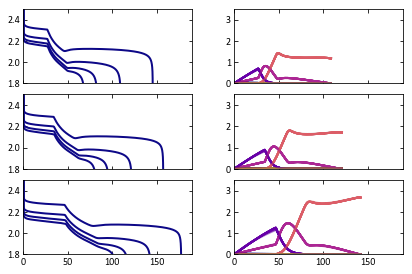

In [29]:
os.chdir(owd)

fig, axs = plt.subplots(3, 2, sharex=True, sharey=False, num=i)
plt.tight_layout()

for i in range(3):
    for j in range(2):
        axs[i,j].tick_params(direction='in')
        tick_format(axs[i,j])

fig.set_size_inches((6., 4.))

for i in range(4):
    axs[0,0].plot(m_ratio_4*Cap_Li_4uL[keys_s[i]], Vcell_Li_4uL[keys_s[i]], linewidth=lw, color=species_cmap[0])
    axs[1,0].plot(m_ratio_3*Cap_Li_3uL[keys_s[i]], Vcell_Li_3uL[keys_s[i]], linewidth=lw, color=species_cmap[0])
    axs[2,0].plot(m_ratio_2*Cap_Li_2uL[keys_s[i]], Vcell_Li_2uL[keys_s[i]], linewidth=lw, color=species_cmap[0])
    

i=1
for j in np.arange(0, points-1):
    offset = j*6
    for k in np.arange(0, 6):
        axs[0,1].plot(m_ratio_4*Cap_Li_4uL[keys_s[i]], C_k_Li_4uL[keys_s[i]].iloc[:, k+offset], 
                    linewidth=lw, color=species_cmap[k],alpha=alphas[j])
        axs[1,1].plot(m_ratio_3*Cap_Li_3uL[keys_s[i]], C_k_Li_3uL[keys_s[i]].iloc[:, k+offset], 
                    linewidth=lw, color=species_cmap[k],alpha=alphas[j])
        axs[2,1].plot(m_ratio_2*Cap_Li_2uL[keys_s[i]], C_k_Li_2uL[keys_s[i]].iloc[:, k+offset],
                        linewidth=lw, color=species_cmap[k],alpha=alphas[j])

for i in range(3):
    axs[i,0].set_xlim((0,190))
    axs[i,0].set_xticks([0, 50, 100, 150])
    axs[i,0].set_ylim((1.8,2.5))
    axs[i,0].set_yticks([1.8, 2.0, 2.2, 2.4])

    axs[i,1].set_xlim((0,190))
    axs[i,1].set_xticks([0, 50, 100, 150])
    axs[i,1].set_ylim((0.0,3.5))
    axs[i,1].set_yticks([0.0, 1.0, 2.0, 3.0])

plt.subplots_adjust(hspace=0.15,wspace=0.25)
    
fig.savefig('Figure5_CellDesign_DischargeProfiles.pdf')
os.chdir(owd)

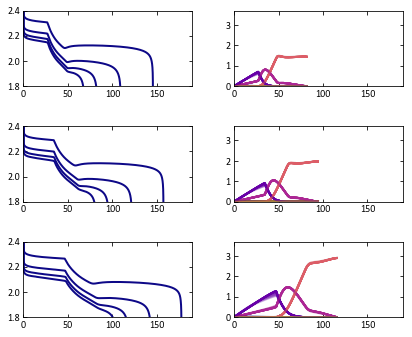

In [37]:
os.chdir(owd)

fig, axs = plt.subplots(3, 2, sharex=False, sharey=False, num=i)
plt.tight_layout()

for i in range(3):
    for j in range(2):
        axs[i,j].tick_params(direction='in')
        tick_format(axs[i,j])

fig.set_size_inches((6., 5.))

for i in range(4):
    axs[0,0].plot(m_ratio_4*Cap_Li_4uL[keys_s[i]], Vcell_Li_4uL[keys_s[i]], linewidth=lw, color=species_cmap[0])
    axs[1,0].plot(m_ratio_3*Cap_Li_3uL[keys_s[i]], Vcell_Li_3uL[keys_s[i]], linewidth=lw, color=species_cmap[0])
    axs[2,0].plot(m_ratio_2*Cap_Li_2uL[keys_s[i]], Vcell_Li_2uL[keys_s[i]], linewidth=lw, color=species_cmap[0])
    

i=2
for j in np.arange(0, points-1):
    offset = j*6
    for k in np.arange(0, 6):
        axs[0,1].plot(m_ratio_4*Cap_Li_4uL[keys_s[i]], C_k_Li_4uL[keys_s[i]].iloc[:, k+offset], 
                    linewidth=lw, color=species_cmap[k],alpha=alphas[j])
        axs[1,1].plot(m_ratio_3*Cap_Li_3uL[keys_s[i]], C_k_Li_3uL[keys_s[i]].iloc[:, k+offset], 
                    linewidth=lw, color=species_cmap[k],alpha=alphas[j])
        axs[2,1].plot(m_ratio_2*Cap_Li_2uL[keys_s[i]], C_k_Li_2uL[keys_s[i]].iloc[:, k+offset],
                        linewidth=lw, color=species_cmap[k],alpha=alphas[j])

for i in range(3):
    axs[i,0].set_xlim((0,190))
    axs[i,0].set_xticks([0, 50, 100, 150])
    axs[i,0].set_ylim((1.8,2.4))
    axs[i,0].set_yticks([1.8, 2.0, 2.2, 2.4])

    axs[i,1].set_xlim((0,190))
    axs[i,1].set_xticks([0, 50, 100, 150])
    axs[i,1].set_ylim((0.0,3.7))
    axs[i,1].set_yticks([0.0, 1.0, 2.0, 3.0])


fig.savefig('FigureSupp_CellDesign_DischargeProfiles_1C.pdf')
os.chdir(owd)

# Plotting Ragone plots to show stability

## Ragone plot comparing Li2S2 concentration at 4 uL/mg, 3 uL/mg, and 2 uL/mg E/S ratios

In [38]:
Li2S8_max = 7
Li2S4_max = 2

Li2S6_max = 6   

i_ext_0 = -4.189
i_ext_4uL1 = i_ext_0*np.arange(1,21)

i_ext_0 = -5.392
i_ext_3uL1 = i_ext_0*np.arange(1,21)

i_ext_0 = -7.548
i_ext_2uL1 = i_ext_0*np.arange(1,21)

Power_cascade_4uL1 = np.zeros((len(keys_ES)))
E_rec_4uL1 = np.zeros((len(keys_ES)))
for i in np.arange(0, len(keys_ES)):
    Vcell_cascadei_4uL1 = Vcell_Li_4uL[keys_ES[i]]
    Cap_cascadei_4uL1 = Cap_Li_4uL[keys_ES[i]]
    dCap = []
    C_prev = Cap_cascadei_4uL1.iloc[0]
    for C in Cap_cascadei_4uL1.iloc[1:]:
        dCap.append(C - C_prev)
        C_prev = C

    Vcell_cascade_avg_4uL1 = np.dot(Vcell_cascadei_4uL1.iloc[:-1],dCap)/Cap_cascadei_4uL1.iloc[-1]
    Power_cascade_4uL1[i] = -Vcell_cascade_avg_4uL1*i_ext_4uL1[i]*inputs.A_cat/m_bat_4
    E_rec_4uL1[i] = -(Vcell_cascade_avg_4uL1*Cap_cascadei_4uL1.iloc[-1]*m_ratio_4)
    
Power_cascade_3uL1 = np.zeros((len(keys_ES)))
E_rec_3uL1 = np.zeros((len(keys_ES)))
for i in np.arange(0, len(keys_ES)):
    Vcell_cascadei_3uL1 = Vcell_Li_3uL[keys_ES[i]]
    Cap_cascadei_3uL1 = Cap_Li_3uL[keys_ES[i]]
    dCap = []
    C_prev = Cap_cascadei_3uL1.iloc[0]
    for C in Cap_cascadei_3uL1.iloc[1:]:
        dCap.append(C - C_prev)
        C_prev = C

    Vcell_cascade_avg_3uL1 = np.dot(Vcell_cascadei_3uL1.iloc[:-1],dCap)/Cap_cascadei_3uL1.iloc[-1]
    Power_cascade_3uL1[i] = -Vcell_cascade_avg_3uL1*i_ext_3uL1[i]*inputs.A_cat/an3uL1.m_bat
    E_rec_3uL1[i] = -(Vcell_cascade_avg_3uL1*Cap_cascadei_3uL1.iloc[-1]*m_ratio_3)
    
Power_cascade_2uL1 = np.zeros((len(keys_ES)))
E_rec_2uL1 = np.zeros((len(keys_ES)))
for i in np.arange(0, len(keys_ES)):
    Vcell_cascadei_2uL1 = Vcell_Li_2uL[keys_ES[i]]
    Cap_cascadei_2uL1 = Cap_Li_2uL[keys_ES[i]]

    dCap = []
    C_prev = Cap_cascadei_2uL1.iloc[0]
    for C in Cap_cascadei_2uL1.iloc[1:]:
        dCap.append(C - C_prev)
        C_prev = C
        
    Vcell_cascade_avg_2uL1 = np.dot(Vcell_cascadei_2uL1.iloc[:-1],dCap)/Cap_cascadei_2uL1.iloc[-1]
    Power_cascade_2uL1[i] = -Vcell_cascade_avg_2uL1*i_ext_2uL1[i]*inputs.A_cat/an2uL1.m_bat
    E_rec_2uL1[i] = -(Vcell_cascade_avg_2uL1*Cap_cascadei_2uL1.iloc[-1]*m_ratio_2)

In [39]:
Max_conc_4uL1 = np.zeros((len(keys_ES)))
for i in np.arange(0, len(keys_ES)):
    maxlist = []
    for j in np.arange(20):
        if hasattr(C_k_Li_4uL[keys_ES[i]]['rho_Li2S2(e)_cat'+str(j+1)].max(), '__len__')==False:
            maxlist.append(C_k_Li_4uL[keys_ES[i]]['rho_Li2S2(e)_cat'+str(j+1)].max())
        else:
            maxlist.append(C_k_Li_4uL[keys_ES[i]]['rho_Li2S2(e)_cat'+str(j+1)].max().iloc[-1])
    #print(i, maxlist)
    Max_conc_4uL1[i] = max(maxlist)

Max_conc_norm_4uL1 = Max_conc_4uL1/max(Max_conc_4uL1)  

plasma_custom_4uL1 = matplotlib.cm.plasma(Max_conc_norm_4uL1)
#---------------------------------------------------------------------------------------------
Max_conc_3uL1 = np.zeros((len(keys_ES)))
for i in np.arange(0, len(keys_ES)):
    maxlist = []
    for j in np.arange(20):
        if hasattr(C_k_Li_3uL[keys_ES[i]]['rho_Li2S2(e)_cat'+str(j+1)].max(), '__len__')==False:
            maxlist.append(C_k_Li_3uL[keys_ES[i]]['rho_Li2S2(e)_cat'+str(j+1)].max())
        else:
            maxlist.append(C_k_Li_3uL[keys_ES[i]]['rho_Li2S2(e)_cat'+str(j+1)].max().iloc[-1])
    
    Max_conc_3uL1[i] = max(maxlist)
    
Max_conc_norm_3uL1 = Max_conc_3uL1/max(Max_conc_3uL1) 

plasma_custom_3uL1 = matplotlib.cm.plasma(Max_conc_norm_3uL1)
#---------------------------------------------------------------------------------------------
Max_conc_2uL1 = np.zeros((len(keys_ES)))
for i in np.arange(0, len(keys_ES)):
    maxlist = []
    for j in np.arange(20):
        if hasattr(C_k_Li_2uL[keys_ES[i]]['rho_Li2S2(e)_cat'+str(j+1)].max(), '__len__')==False:
            maxlist.append(C_k_Li_2uL[keys_ES[i]]['rho_Li2S2(e)_cat'+str(j+1)].max())
        else:
            maxlist.append(C_k_Li_2uL[keys_ES[i]]['rho_Li2S2(e)_cat'+str(j+1)].max().iloc[-1])
    
    Max_conc_2uL1[i] = max(maxlist)

Max_conc_norm_2uL1 = Max_conc_2uL1/max(Max_conc_2uL1)

plasma_custom_2uL1 = matplotlib.cm.plasma(Max_conc_norm_2uL1)

0.008102504


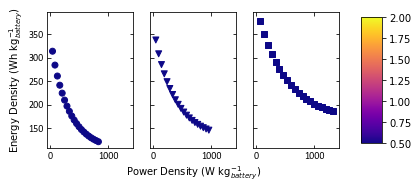

In [40]:
os.chdir(owd)
# os.chdir('Figures/ragone plots')
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, num=i)
for i in range(3):
    axs[i].tick_params(direction='in')
    tick_format(axs[i])

fig.set_size_inches((6., 2.5))
val_max = 2
val_min = 0.5
print(max(Max_conc_2uL1))
axs[0].scatter(Power_cascade_4uL1, -E_rec_4uL1, marker='o', c=Max_conc_4uL1, cmap='plasma',
                 vmin=val_min, vmax=val_max)
axs[1].scatter(Power_cascade_3uL1, -E_rec_3uL1, marker='v', c=Max_conc_3uL1, cmap='plasma',
                 vmin=val_min, vmax=val_max)
plt3 = axs[2].scatter(Power_cascade_2uL1, -E_rec_2uL1, marker=',', c=Max_conc_2uL1, cmap='plasma',
                 vmin=val_min, vmax=val_max)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(plt3, cax=cbar_ax)

axs[1].set_xlabel('Power Density (W kg$^{-1}_{battery}$)')
axs[0].set_ylabel('Energy Density (Wh kg$^{-1}_{battery}$)')

# axs[0].set_xlim((-0, 1400))
# axs[0].set_xticks([0, 400, 800, 1200])
# axs[0].set_yticks([0,50,100,150,200])

fig.savefig('Supplemental_Figure_Ragone_Li2S2.pdf',dpi=350)
os.chdir(owd)

## Ragone plot comparing Li2S4 concentration at 4 uL/mg, 3 uL/mg, and 2 uL/mg E/S ratios

In [41]:
os.chdir(owd)
os.chdir('../data/Lithiated Data/100 um cathode 4 uL')
from li_s_battery_init import cathode as cat4uL2
from li_s_battery_init import anode as an4uL2
os.chdir(owd)

os.chdir(owd)
os.chdir('../data/Lithiated Data/100 um cathode 3 uL')
from li_s_battery_init import cathode as cat3uL2
from li_s_battery_init import anode as an3uL2
os.chdir(owd)

os.chdir(owd)
os.chdir('../data/Lithiated Data/100 um cathode 2 uL')
from li_s_battery_init import cathode as cat2uL2
from li_s_battery_init import anode as an2uL2
os.chdir(owd)

In [42]:
Max_conc_4uL2 = np.zeros((len(keys_ES)))
for i in np.arange(0, len(keys_ES)):
    maxlist = []
    for j in np.arange(20):
        if hasattr(C_k_Li_4uL[keys_ES[i]]['rho_Li2S4(e)_cat'+str(j+1)].max(), '__len__')==False:
            maxlist.append(C_k_Li_4uL[keys_ES[i]]['rho_Li2S4(e)_cat'+str(j+1)].max())
        else:
            maxlist.append(C_k_Li_4uL[keys_ES[i]]['rho_Li2S4(e)_cat'+str(j+1)].max().iloc[-1])

    Max_conc_4uL2[i] = max(maxlist)

Max_conc_norm_4uL2 = Max_conc_4uL2/max(Max_conc_4uL2)

plasma_custom_4uL2 = matplotlib.cm.plasma(Max_conc_norm_4uL2)
#---------------------------------------------------------------------------------------------
Max_conc_3uL2 = np.zeros((len(keys_ES)))
for i in np.arange(0, len(keys_ES)):
    maxlist = []
    for j in np.arange(20):
        if hasattr(C_k_Li_3uL[keys_ES[i]]['rho_Li2S4(e)_cat'+str(j+1)].max(), '__len__')==False:
            maxlist.append(C_k_Li_3uL[keys_ES[i]]['rho_Li2S4(e)_cat'+str(j+1)].max())
        else:
            maxlist.append(C_k_Li_3uL[keys_ES[i]]['rho_Li2S4(e)_cat'+str(j+1)].max().iloc[-1])

    Max_conc_3uL2[i] = max(maxlist)
    
Max_conc_norm_3uL2 = Max_conc_3uL2/max(Max_conc_3uL2)

plasma_custom_3uL2 = matplotlib.cm.plasma(Max_conc_norm_3uL2)
#---------------------------------------------------------------------------------------------
Max_conc_2uL2 = np.zeros((len(keys_ES)))
for i in np.arange(0, len(keys_ES)):
    maxlist = []
    for j in np.arange(20):
        if hasattr(C_k_Li_2uL[keys_ES[i]]['rho_Li2S4(e)_cat'+str(j+1)].max(), '__len__')==False:
            maxlist.append(C_k_Li_2uL[keys_ES[i]]['rho_Li2S4(e)_cat'+str(j+1)].max())
        else:
            maxlist.append(C_k_Li_2uL[keys_ES[i]]['rho_Li2S4(e)_cat'+str(j+1)].max().iloc[-1])

    Max_conc_2uL2[i] = max(maxlist)

Max_conc_norm_2uL2 = Max_conc_2uL2/max(Max_conc_2uL2)

plasma_custom_2uL2 = matplotlib.cm.plasma(Max_conc_norm_2uL2)

3.0114176511032276


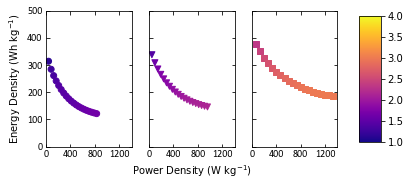

In [43]:
os.chdir(owd)
# os.chdir('Figures/ragone plots')
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, num=i)

for i in range(3):
    axs[i].tick_params(direction='in')
    tick_format(axs[i])

fig.set_size_inches((6., 2.5))
print(max(Max_conc_2uL2))


val_min=min(min(Max_conc_4uL2), min(Max_conc_3uL2), min(Max_conc_2uL2))
val_min = floor(val_min)
val_max=max(max(Max_conc_4uL2), max(Max_conc_3uL2), max(Max_conc_2uL2))
val_max = ceil(val_max)
axs[0].scatter(Power_cascade_4uL1, -E_rec_4uL1, marker='o', c=Max_conc_4uL2, cmap='plasma',
                 vmin=val_min, vmax=val_max)
axs[1].scatter(Power_cascade_3uL1, -E_rec_3uL1, marker='v', c=Max_conc_3uL2, cmap='plasma',
                 vmin=val_min, vmax=val_max)
plt3 = axs[2].scatter(Power_cascade_2uL1, -E_rec_2uL1, marker=',', c=Max_conc_2uL2, cmap='plasma',
                 vmin=val_min, vmax=val_max)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(plt3, cax=cbar_ax)

axs[1].set_xlabel('Power Density (W kg$^{-1}$)')

axs[0].set_ylabel('Energy Density (Wh kg$^{-1}$)')

axs[0].set_xlim((0, 1400))
axs[0].set_xticks([0, 400, 800, 1200])
axs[0].set_ylim((0,500))
axs[0].set_yticks([0,100,200,300,400,500])

#plt.colorbar(ax=axs[2])
#plt.ylim((75, 285))
#plt.xlim((20, 450))
fig.savefig('Figure6_Ragone_Li2S4.pdf',dpi=350)
os.chdir(owd)

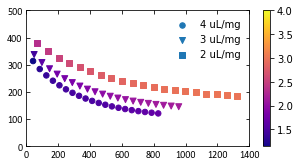

In [44]:
os.chdir(owd)
# fig = plt.figure(1)
fig, ax = plt.subplots(1, 1)# fig.add_axes([0.2, 0.2, 0.5, 0.75])
tick_format(ax)
fig.set_size_inches((5., 2.5))

tick_format(ax)

val_min=min(min(Max_conc_4uL2), min(Max_conc_3uL2), min(Max_conc_2uL2))
val_max=max(max(Max_conc_4uL2), max(Max_conc_3uL2), max(Max_conc_2uL2))
val_max = ceil(val_max)
p1 = ax.scatter(Power_cascade_4uL1, -E_rec_4uL1, marker='o', s=30.0, c=Max_conc_4uL2,# edgecolors='k',
                 cmap='plasma', vmin=val_min, vmax=val_max)
p2 = ax.scatter(Power_cascade_3uL1, -E_rec_3uL1, marker='v', c=Max_conc_3uL2,# edgecolors='k',
                 cmap='plasma', vmin=val_min, vmax=val_max)
p3 = ax.scatter(Power_cascade_2uL1, -E_rec_2uL1, marker=',', c=Max_conc_2uL2,# edgecolors='k',
                 cmap='plasma', vmin=val_min, vmax=val_max)
plt.colorbar(p2)
plt.ylim((0, 500))
plt.legend(['4 uL/mg', '3 uL/mg', '2 uL/mg'],frameon=False)
plt.xlim((0, 1400))
fig.savefig('Figure6_Ragone_Li2S4.pdf',dpi=350)
os.chdir(owd)

# Ragone plot for 65% cathode porosity 10 um separator

In [ ]:
Li2S8_max = 7
Li2S4_max = 2
#Li2S2_max = 0.00695
#Li2S_max = 0.0008

Li2S6_max = 6
#Li2S3_max = 0.5*(Li2S4_max + Li2S2_max)
i_ext_0 = -3.279
i_ext_25um = [i_ext_0, i_ext_0*2, i_ext_0*3, i_ext_0*4, i_ext_0*5, i_ext_0*6, i_ext_0*7, 
         i_ext_0*8, i_ext_0*9, i_ext_0*10, i_ext_0*11, i_ext_0*12, i_ext_0*13,
         i_ext_0*14, i_ext_0*15]
i_ext_0 = -3.273
i_ext_10um = [i_ext_0, i_ext_0*2, i_ext_0*3, i_ext_0*4, i_ext_0*5, i_ext_0*6, i_ext_0*7, 
         i_ext_0*8, i_ext_0*9, i_ext_0*10, i_ext_0*11, i_ext_0*12, i_ext_0*13,
         i_ext_0*14, i_ext_0*15]
Power_cascade = np.zeros((len(keys)))
E_rec = np.zeros((len(keys)))
for i in np.arange(0, len(keys)):
    Vcell_cascadei = Vcell_Li_65pct10um[keys[i]]
    Cap_cascadei = Cap_Li_65pct10um[keys[i]]
    Vcell_cascade_avg = np.average(Vcell_cascadei)
    Power_cascade[i] = -Vcell_cascade_avg*i_ext_10um[i]*inputs.A_cat/an.m_bat
    E_rec[i] = -Vcell_cascade_avg*Cap_cascadei.iloc[-1]*(cat.m_S_0 + cat.m_S_el)/an.m_bat
    
print(Power_cascade, -E_rec)

In [ ]:
Max_conc = np.zeros((len(keys)))
for i in np.arange(0, len(keys)):
    #print(C_k_cascade[keys[i]])
    max1 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat1'])
    max2 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat2'])
    max3 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat3'])
    max4 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat4'])
    max5 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat5'])
    max6 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat6'])
    max7 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat7'])
    max8 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat8'])
    max9 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat9'])
    max10 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat10'])
    max11 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat11'])
    max12 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat12'])
    max13 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat13'])
    max14 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat14'])
    max15 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat15'])
    max16 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat16'])
    max17 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat17'])
    max18 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat18'])
    max19 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat19'])
    max20 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat20'])
    
    Max_conc[i] = max(max1, max2, max3, max4, max5, max6, max7, max8, max9, max10,
                      max11, max12, max13, max14, max15, max16, max17, max18, max19, max20)
print(Max_conc)

Max_conc_norm = Max_conc/max(Max_conc)  #Li2S4_max
print(Max_conc_norm)

plasma_custom = matplotlib.cm.plasma(Max_conc_norm)

In [ ]:
os.chdir(owd)
os.chdir('Figures/ragone plots')
fig = plt.figure(1)
ax = fig.add_axes([0.2, 0.2, 0.6, 0.75])
ax.tick_params(direction='in')
fig.set_size_inches((8., 5.))

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

p1 = plt.scatter(Power_cascade, -E_rec, c=Max_conc_norm, cmap='plasma', 
                 vmin=0., vmax=1.)
plt.colorbar(p1)
plt.ylim((75, 285))
plt.xlim((20, 450))
fig.savefig('Ragone_65pct10um.pdf')
os.chdir(owd)

# Archived code ----------------------------------------------------------------

In [ ]:
Power_Li = np.zeros((len(keys)))
E_rec_Li = np.zeros((len(keys)))
for i in np.arange(0, len(keys)):
    Vcell_Lii = Vcell_Li[keys[i]]
    Cap_Lii = Cap_Li[keys[i]]
    Vcell_Li_avg = np.average(Vcell_Lii)
    Power_Li[i] = -Vcell_Li_avg*i_ext[i]*inputs.A_cat/an.m_bat
    E_rec_Li[i] = -Vcell_Li_avg*Cap_Lii.iloc[-1]*(cat.m_S_0 + cat.m_S_el)/an.m_bat
    
print(Power_Li, -E_rec_Li)

In [ ]:
Max_conc = np.zeros((len(keys)))
for i in np.arange(0, len(keys)):
    #print(C_k_cascade[keys[i]])
    max1 = max(C_k_Li[keys[i]]['rho_Li2S2(e)_cat1'])
    max2 = max(C_k_Li[keys[i]]['rho_Li2S2(e)_cat2'])
    max3 = max(C_k_Li[keys[i]]['rho_Li2S2(e)_cat3'])
    #max4 = max(C_k_cascade[keys[i]]['rho_S2-(e)_cat4'])
    #max5 = max(C_k_cascade[keys[i]]['rho_S2-(e)_cat5'])
    Max_conc[i] = max(max1, max2, max3)
print(Max_conc)

Max_conc_norm = Max_conc/max(Max_conc)  #Li2S4_max
print(Max_conc_norm)

plasma_custom = matplotlib.cm.plasma(Max_conc_norm)

In [ ]:
os.chdir(owd)
os.chdir('Figures/ragone plots')
fig = plt.figure(1)
ax = fig.add_axes([0.2, 0.2, 0.6, 0.75])
ax.tick_params(direction='in')
fig.set_size_inches((8., 5.))

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

p1 = plt.scatter(Power_Li, -E_rec_Li, c=Max_conc, cmap='plasma', 
                 vmin=0.3, vmax=1+0.05)
#plt.colorbar(p1)
plt.ylim((75, 285))
plt.xlim((20, 450))
fig.savefig('Ragone_Li.png')
os.chdir(owd)

In [ ]:
Power_bessler = np.zeros((len(keys)))
E_rec_bessler = np.zeros((len(keys)))
for i in np.arange(0, len(keys)):
    Vcell_bessleri = Vcell_bessler[keys[i]]
    Cap_bessleri = Cap_bessler[keys[i]]
    Vcell_bessler_avg = np.average(Vcell_bessleri)
    Power_bessler[i] = -Vcell_bessler_avg*i_ext[i]*inputs.A_cat/an.m_bat
    E_rec_bessler[i] = -Vcell_bessler_avg*Cap_bessleri.iloc[-1]*(cat.m_S_0 + cat.m_S_el)/an.m_bat
    
print(Power_bessler, -E_rec_bessler)

In [ ]:
Max_conc = np.zeros((len(keys)))
for i in np.arange(0, len(keys)):
    #print(C_k_cascade[keys[i]])
    max1 = max(C_k_bessler[keys[i]]['rho_S2-(e)_cat1'])
    max2 = max(C_k_bessler[keys[i]]['rho_S2-(e)_cat2'])
    max3 = max(C_k_bessler[keys[i]]['rho_S2-(e)_cat3'])
    #max4 = max(C_k_cascade[keys[i]]['rho_S2-(e)_cat4'])
    #max5 = max(C_k_cascade[keys[i]]['rho_S2-(e)_cat5'])
    Max_conc[i] = max(max1, max2, max3)
print(Max_conc)

Max_conc_norm = Max_conc/max(Max_conc)  #Li2S4_max
print(Max_conc_norm)

plasma_custom = matplotlib.cm.plasma(Max_conc_norm)

In [ ]:
os.chdir(owd)
os.chdir('Figures/ragone plots')
fig = plt.figure(1)
ax = fig.add_axes([0.2, 0.2, 0.6, 0.75])
ax.tick_params(direction='in')
fig.set_size_inches((8., 5.))

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

p1 = plt.scatter(Power_bessler, -E_rec_bessler, c=Max_conc_norm, cmap='plasma', 
                 vmin=0.3, vmax=1+0.05)
#plt.colorbar(p1)
plt.ylim((75, 285))
plt.xlim((20, 450))
fig.savefig('Ragone_bessler.png')
os.chdir(owd)

## Plotting mean polysulfide concentrations (order >=4)

In [ ]:
def plot_meanPS(SV_df, tags, cycle):

#    C_k = SV_df[tags['rho_el'][cathode.i_S8:-2]].copy()
    meanPS = np.zeros([len(SV_df.index), inputs.npoints_cathode])
    for i in np.arange(inputs.npoints_cathode):
        for j in np.arange(len(SV_df.index)):
            offset = i*10
            C_k = SV_df[tags['rho_el'][5+offset:offset+8]].copy()
            meanPS[j, i] = sum(cat.n_S_atoms[5:-2]*C_k.iloc[j, :])/sum(cat.S_atoms_bool[5:-2]*C_k.iloc[j, :])
          
    "Set up your figure"
    fig = plt.figure(2)
    ax = fig.add_axes([0.2,0.2,0.6,0.75])
    fig.set_size_inches((8.,5.0))
    
    "Formatting for the figure:"
    fs = 20     #font size for plots
    lw = 2.0    #line width for plots
#    font = plt.matplotlib.font_manager.FontProperties(family='Times New Roman',size=fs-1)
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname('Times New Roman')
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname('Times New Roman')    
    
    for i in np.arange(inputs.npoints_cathode):
        p1, = plt.plot(SV_df.loc[:, 'Time'], meanPS[:, i], '-', linewidth=lw)
        plt.xlim((0, 1770))
        plt.xticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600])
        plt.yticks([2, 3, 4, 5, 6, 7, 8])
        plt.ylabel('Cell Voltage [V]', fontstyle='normal', fontname='Times new Roman', fontsize=fs+2, labelpad=5.0)
        plt.xlabel(r'Capacity $[\mathrm{Ah} \hspace{0.5} \mathrm{kg}^{-1}_{\mathrm{sulfur}}]$', fontstyle='normal', fontname='Times new Roman', fontsize=fs+2, labelpad=5.0)
        
    return